In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Read Data

In [3]:
#Veri dosyasını yükle
df_train=pd.read_csv('/kaggle/input/titanic/train.csv') 
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data = pd.concat([df_train,df_test],ignore_index= True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
df_train.shape,df_test.shape,data.shape

((891, 12), (418, 11), (1309, 12))

In [13]:
data.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [15]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
#Embarked ekiks veiryi doldur
#en çok tekrar eden değeri kullan
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True) #data['Embarked'].mode()[0] birden fazla mod olabilir o yüzden ilkini al
data['Embarked'].isnull().sum()

0

In [17]:
data['Age'].value_counts()

Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64

In [18]:
data['Age'].isnull().sum()

263

Ünvan Çıkarımı

In [19]:
#Unvanları alalım
data['Title']=data['Name'].str.extract('([A-Za-z]+)\.')

In [20]:
#hangi unvanlar var
data['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [21]:
#Fransızca veya diğer dillerdeki ünvanları uygn şekilde çevirdik
data['Title']=data['Title'].replace(['Ms','Mlle'],'Miss')
data['Title']=data['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
data['Title']=data['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [22]:
data['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [23]:
#Yaş değerlerini doldur
data['Age'].fillna(data.groupby('Title')['Age'].transform('mean'),inplace=True) # unvanların yaş ortalamalarına göre eksik yaşları doldur
data['Age'].isnull().sum()

0

In [24]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [25]:
data[data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [26]:
data['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [27]:
data['Fare'].median()

14.4542

In [28]:
data['Fare'] = data.groupby(['Pclass', 'Embarked'])['Fare'].transform(lambda x: x.fillna(x.median()))
data['Fare'].isnull().sum()

0

In [29]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [30]:
data = data.drop(['Cabin'],axis=1)

In [31]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [33]:
# "Pclass" sütununu kategorik veri türüne dönüştürme
data['Pclass'] = data['Pclass'].astype('category')

# Dönüşümün başarılı olup olmadığını kontrol etme
print(data['Pclass'].dtype)

category


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Embarked     1309 non-null   object  
 11  Title        1309 non-null   object  
dtypes: category(1), float64(3), int64(3), object(5)
memory usage: 114.0+ KB


In [35]:
data['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [36]:
data['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [37]:
# Pclass sütununu One-Hot encoding yapma, 2 sütunla temsil etme
pclass_one_hot = pd.get_dummies(data['Pclass'], prefix='Pclass', drop_first=True)

# Oluşan One-Hot encoding verilerini orijinal veri setine eklemek
data = pd.concat([data, pclass_one_hot], axis=1)


In [38]:
# Sex sütununu One-Hot encoding yapma, sadece 'male' olanlar için 1 yapma
sex_one_hot = pd.get_dummies(data['Sex'], prefix='Sex', drop_first=True)

# Oluşan One-Hot encoding verilerini orijinal veri setine eklemek
data = pd.concat([data, sex_one_hot], axis=1)

In [39]:
# Pclass sütununu One-Hot encoding yapma, 2 sütunla temsil etme
Embarked_one_hot = pd.get_dummies(data['Embarked'], prefix='Embarked', drop_first=True)

# Oluşan One-Hot encoding verilerini orijinal veri setine eklemek
data = pd.concat([data, Embarked_one_hot], axis=1)


In [40]:
# Pclass sütununu One-Hot encoding yapma, 2 sütunla temsil etme
Title_one_hot = pd.get_dummies(data['Title'], prefix='Title')

# Oluşan One-Hot encoding verilerini orijinal veri setine eklemek
data = pd.concat([data, Title_one_hot], axis=1)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   1309 non-null   int64   
 1   Survived      891 non-null    float64 
 2   Pclass        1309 non-null   category
 3   Name          1309 non-null   object  
 4   Sex           1309 non-null   object  
 5   Age           1309 non-null   float64 
 6   SibSp         1309 non-null   int64   
 7   Parch         1309 non-null   int64   
 8   Ticket        1309 non-null   object  
 9   Fare          1309 non-null   float64 
 10  Embarked      1309 non-null   object  
 11  Title         1309 non-null   object  
 12  Pclass_2      1309 non-null   bool    
 13  Pclass_3      1309 non-null   bool    
 14  Sex_male      1309 non-null   bool    
 15  Embarked_Q    1309 non-null   bool    
 16  Embarked_S    1309 non-null   bool    
 17  Title_Master  1309 non-null   bool    
 18  Title_Mi

In [42]:
data_encoded = data.copy()

In [43]:
columns_to_drop = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked', 'Title']
data_encoded.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [44]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Age           1309 non-null   float64
 2   SibSp         1309 non-null   int64  
 3   Parch         1309 non-null   int64  
 4   Fare          1309 non-null   float64
 5   Pclass_2      1309 non-null   bool   
 6   Pclass_3      1309 non-null   bool   
 7   Sex_male      1309 non-null   bool   
 8   Embarked_Q    1309 non-null   bool   
 9   Embarked_S    1309 non-null   bool   
 10  Title_Master  1309 non-null   bool   
 11  Title_Miss    1309 non-null   bool   
 12  Title_Mr      1309 non-null   bool   
 13  Title_Mrs     1309 non-null   bool   
dtypes: bool(9), float64(3), int64(2)
memory usage: 62.8 KB


In [45]:
data_encoded = data_encoded.loc[:, ~data_encoded.columns.duplicated()]
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Age           1309 non-null   float64
 2   SibSp         1309 non-null   int64  
 3   Parch         1309 non-null   int64  
 4   Fare          1309 non-null   float64
 5   Pclass_2      1309 non-null   bool   
 6   Pclass_3      1309 non-null   bool   
 7   Sex_male      1309 non-null   bool   
 8   Embarked_Q    1309 non-null   bool   
 9   Embarked_S    1309 non-null   bool   
 10  Title_Master  1309 non-null   bool   
 11  Title_Miss    1309 non-null   bool   
 12  Title_Mr      1309 non-null   bool   
 13  Title_Mrs     1309 non-null   bool   
dtypes: bool(9), float64(3), int64(2)
memory usage: 62.8 KB


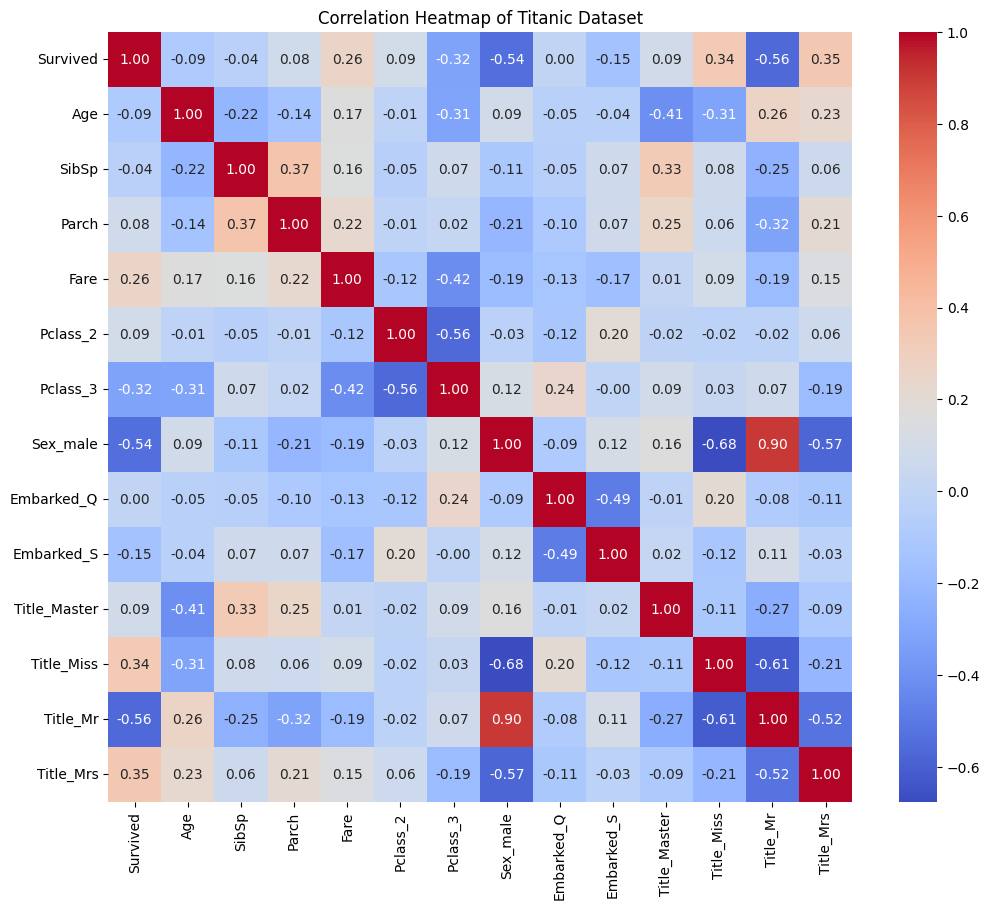

In [46]:
# Korelasyon matrisini oluşturma
correlation_matrix = data_encoded.corr()

# Heatmap çizdirme
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

In [47]:
# Fare, Parch, SibSp, Age sütunlarından polinomlar oluşturma
for feature in ['Fare', 'Age']:
    for degree in [2, 3]:  # Polinom derecesi 2 ve 3 olarak örnek verilmiştir
        new_column_name = f'{feature}_poly_{degree}'
        data_encoded[new_column_name] = np.power(data_encoded[feature], degree)

# İlişkisel sütunlar oluşturma (örnek olarak Fare ve Age arasındaki etkileşim)
data_encoded['Fare_Age_interaction'] = data_encoded['Fare'] * data_encoded['Age']
data_encoded['SibSp_Parch_interaction'] = data_encoded['SibSp'] * data_encoded['Parch']

In [48]:
y = data_encoded['Survived']
X = data_encoded.drop(columns=['Survived'])  # Survived dışındaki tüm sütunlar
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Fare_poly_2,Fare_poly_3,Age_poly_2,Age_poly_3,Fare_Age_interaction,SibSp_Parch_interaction
0,22.0,1,0,7.2500,False,True,True,False,True,False,False,True,False,52.562500,381.078125,484.0,10648.0,159.5000,0
1,38.0,1,0,71.2833,False,False,False,False,False,False,False,False,True,5081.308859,362212.463781,1444.0,54872.0,2708.7654,0
2,26.0,0,0,7.9250,False,True,False,False,True,False,True,False,False,62.805625,497.734578,676.0,17576.0,206.0500,0
3,35.0,1,0,53.1000,False,False,False,False,True,False,False,False,True,2819.610000,149721.291000,1225.0,42875.0,1858.5000,0
4,35.0,0,0,8.0500,False,True,True,False,True,False,False,True,False,64.802500,521.660125,1225.0,42875.0,281.7500,0


In [49]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [50]:
#Train ve testi aşağıdaki gibi ayırıyoruz
X_train=X[:891] #Train veri setinde ilk 891
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

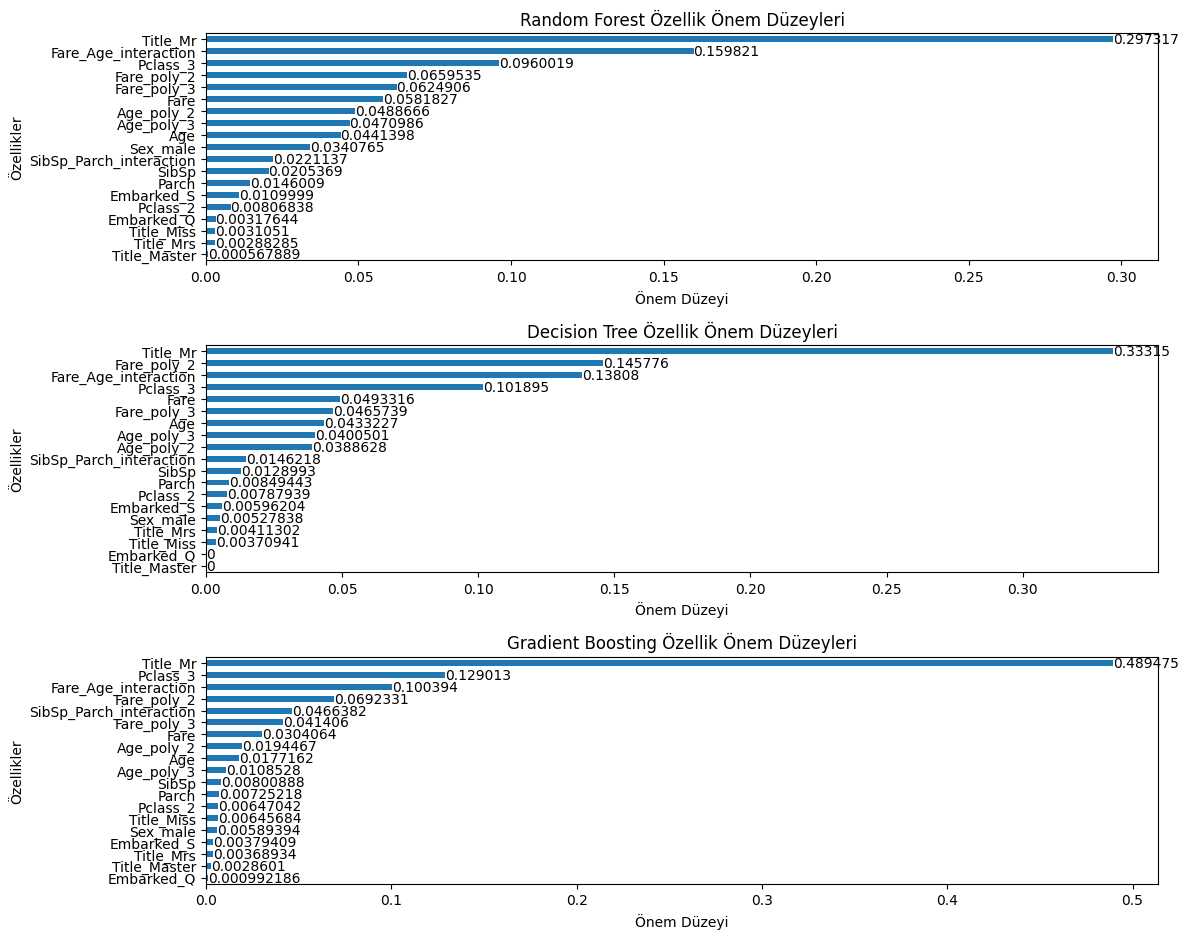

                   features  rf_importance  dt_importance  gb_importance
0                       Age       0.044140       0.043323       0.017716
1                     SibSp       0.020537       0.012899       0.008009
2                     Parch       0.014601       0.008494       0.007252
3                      Fare       0.058183       0.049332       0.030406
4                  Pclass_2       0.008068       0.007879       0.006470
5                  Pclass_3       0.096002       0.101895       0.129013
6                  Sex_male       0.034077       0.005278       0.005894
7                Embarked_Q       0.003176       0.000000       0.000992
8                Embarked_S       0.011000       0.005962       0.003794
9              Title_Master       0.000568       0.000000       0.002860
10               Title_Miss       0.003105       0.003709       0.006457
11                 Title_Mr       0.297317       0.333150       0.489475
12                Title_Mrs       0.002883       0.

In [51]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


# RandomForestRegressor modelini oluşturma ve eğitme
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# DecisionTreeRegressor modelini oluşturma ve eğitme
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# GradientBoostingRegressor modelini oluşturma ve eğitme
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Özellik önemlerini belirleme
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Grafik yüksekliğini ayarlama
num_features = len(rf_feature_importances)
fig_height = max(6, num_features * 0.5)

# Grafik oluşturma
plt.figure(figsize=(12, fig_height))

# RandomForestRegressor özellik önemleri
plt.subplot(3, 1, 1)
rf_feature_importances.plot(kind='barh')
plt.title('Random Forest Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# DecisionTreeRegressor özellik önemleri
plt.subplot(3, 1, 2)
dt_feature_importances.plot(kind='barh')
plt.title('Decision Tree Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# GradientBoostingRegressor özellik önemleri
plt.subplot(3, 1, 3)
gb_feature_importances.plot(kind='barh')
plt.title('Gradient Boosting Özellik Önem Düzeyleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellikler')

# Barların üstüne değerlerini yazma
for ax in plt.gcf().axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

plt.tight_layout()


# Excel'e yazdırma
feature_importances_df = pd.DataFrame({
    'features': X.columns,
    'rf_importance': rf_feature_importances[X.columns].values,
    'dt_importance': dt_feature_importances[X.columns].values,
    'gb_importance': gb_feature_importances[X.columns].values
})



plt.show()

print(feature_importances_df)

**Libraries**

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,  accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings

from sklearn.exceptions import ConvergenceWarning

In [53]:


# Ignore ConvergenceWarnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)




# Model listesi
models = [
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('KNeighbors', KNeighborsClassifier()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LGBM', LGBMClassifier(verbosity=-1)),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('MultinomialNB', MultinomialNB()),
    ('MLP', MLPClassifier(max_iter=300))
]

# Hiperparametreler için grid
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'ExtraTrees': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'KNeighbors': {'n_neighbors': [3, 5, 7]},
    'QDA': {},
    'LDA': {},
    'XGB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'LGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'GaussianNB': {},
    'BernoulliNB': {'alpha': [0.01, 0.1, 1]},
    'MultinomialNB': {'alpha': [0.01, 0.1, 1]},
    'MLP': {'hidden_layer_sizes': [(100,), (100, 50), (50, 50)], 'activation': ['relu', 'tanh']}
}

# Modellerin eğitimi ve değerlendirilmesi
results = []
for name, model in models:
    print(f"Training {name}")
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

# Sonuçları yazdırma
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best Params: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("\n")

Training LogisticRegression
Training DecisionTree
Training RandomForest
Training GradientBoosting
Training AdaBoost
Training ExtraTrees
Training Bagging
Training KNeighbors
Training QDA
Training LDA
Training XGB
Training LGBM
Training CatBoost
Training GaussianNB
Training BernoulliNB
Training MultinomialNB
Training MLP
Model: LogisticRegression
Best Params: {'C': 0.1}
Accuracy: 0.6604477611940298
Precision: 0.6771204202255467
Recall: 0.6604477611940298
F1 Score: 0.6192755614228406
Confusion Matrix:
[[144  13]
 [ 78  33]]


Model: DecisionTree
Best Params: {'max_depth': 5}
Accuracy: 0.8134328358208955
Precision: 0.8170295031652359
Recall: 0.8134328358208955
F1 Score: 0.8092794953802417
Confusion Matrix:
[[143  14]
 [ 36  75]]


Model: RandomForest
Best Params: {'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.8246268656716418
Precision: 0.8282757560512046
Recall: 0.8246268656716418
F1 Score: 0.8209623524170194
Confusion Matrix:
[[144  13]
 [ 34  77]]


Model: GradientBoosting
Best Params

Model: DecisionTree
Best Params: {'max_depth': 3}
Accuracy: 0.8320610687022901
Precision: 0.832175429568002
Recall: 0.8320610687022901
F1 Score: 0.8287108803030008
Confusion Matrix:
[[74  7]
 [15 35]]
 
 
Model: GradientBoosting
Best Params: {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy: 0.8244274809160306
Precision: 0.8235943224182174
Recall: 0.8244274809160306
F1 Score: 0.8214560302526511
Confusion Matrix:
[[73  8]
 [15 35]]
 
 
 
 Model: ExtraTrees
Best Params: {'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.8396946564885496
Precision: 0.8394969578619499
Recall: 0.8396946564885496
F1 Score: 0.8369815928393769
Confusion Matrix:
[[74  7]
 [14 36]]
 
 
 Model: LGBM
Best Params: {'learning_rate': 0.01, 'n_estimators': 200}
Accuracy: 0.8244274809160306
Precision: 0.8249115620927202
Recall: 0.8244274809160306
F1 Score: 0.8203656528284894
Confusion Matrix:
[[74  7]
 [16 34]]
 
 
 Model: CatBoost
Best Params: {'iterations': 50, 'learning_rate': 0.1}
Accuracy: 0.8320610687022901
Precision: 0.832175429568002
Recall: 0.8320610687022901
F1 Score: 0.8287108803030008
Confusion Matrix:
[[74  7]
 [15 35]]


In [54]:
#Train ve testi aşağıdaki gibi ayırıyoruz
X_train=X[:891] #Train veri setinde ilk 891
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

In [55]:
XTC=ExtraTreesClassifier(max_depth=5, n_estimators=200)
XTC.fit(X_train,y_train)# Testi kaggle üzerinden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.
y_pred=XTC.predict(X_test)
y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [56]:
submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred.astype(int)})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
submission.to_csv('submission.csv', index=False) #data frame i csv dosyası oalrak kaydediyor